In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import seaborn as sns #visualisation


In [3]:
# import data set from the local driver


df1=pd.read_csv('drive/My Drive/Colab Notebooks/train1.csv', sep=';' )# , engine='python')
df2=pd.read_csv('drive/My Drive/Colab Notebooks/train2.csv', sep=';' )
df3=pd.read_csv('drive/My Drive/Colab Notebooks/test1.csv', sep=';' )
df4=pd.read_csv('drive/My Drive/Colab Notebooks/test2.csv', sep=';' )

frames = [df1,df2,df3,df4]
df_concat=pd.concat(frames)
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)



The dataset has 995400 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [4]:
#df_concat.shape

In [5]:
#df_concat.to_csv(r'/home/jovyan/HAI-HIL dataset.csv',index=False)

In [6]:
# drop the columns that are under attack in each stage.
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)

In [7]:
# make the Timestamp to datetime datatype
df1['time'] = pd.to_datetime(df1['time']) # conveting the date time stamp to the timestamp series
df1.head()
# # df1.shape

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


In [8]:
df1.fillna(method = 'ffill', inplace = True)

In [9]:
# a Timestamp as index
df1= df1.set_index('time')
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


##### Interpolation the data with each time stamp  

In [11]:
# resample the data with 5 second
df1=df1.resample('20s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.086703,399.2321,1110.3986,32.0,0.000477,31.381620,35.794627,0.0,0.284057,...,63.831925,0.0,406.934798,-0.000290,338.821377,335.410637,50.9871,9973.000000,27628.933333,0.0
2019-09-11 20:00:20,0.0983,1.109973,399.2321,1110.3986,32.0,0.001053,32.507140,35.872160,0.0,0.283800,...,68.019391,0.0,413.468741,0.000950,344.586713,342.771033,50.9871,9956.933333,27628.866667,0.0
2019-09-11 20:00:40,0.0983,1.112973,399.2321,1110.3986,32.0,0.000200,32.440953,35.882187,0.0,0.283800,...,68.575193,0.0,411.715133,0.000800,342.937387,343.162853,50.9871,9953.400000,27629.000000,0.0
2019-09-11 20:01:00,0.0983,1.109256,399.2321,1110.3986,32.0,0.001003,31.563708,35.871377,0.0,0.283800,...,68.475707,0.0,407.671447,0.000947,339.465180,341.654010,50.9871,9963.500000,27629.000000,0.0
2019-09-11 20:01:20,0.0983,1.044833,399.2321,1110.3986,32.0,0.000000,33.963713,35.655100,0.0,0.283800,...,51.744560,0.0,341.535260,-0.000487,305.635147,318.535393,50.9871,9970.933333,27629.000000,0.0


In [12]:
print(df1.shape)
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count )

(240030, 60)
P1_B2004      190260
P1_B2016      190260
P1_B3004      190260
P1_B3005      190260
P1_B4002      190260
P1_B4005      190260
P1_B400B      190260
P1_B4022      190260
P1_FCV01D     190260
P1_FCV01Z     190260
P1_FCV02D     190260
P1_FCV02Z     190260
P1_FCV03D     190260
P1_FCV03Z     190260
P1_FT01       190260
P1_FT01Z      190260
P1_FT02       190260
P1_FT02Z      190260
P1_FT03       190260
P1_FT03Z      190260
P1_LCV01D     190260
P1_LCV01Z     190260
P1_LIT01      190260
P1_PCV01D     190260
P1_PCV01Z     190260
P1_PCV02D     190260
P1_PCV02Z     190260
P1_PIT01      190260
P1_PIT02      190260
P1_TIT01      190260
P1_TIT02      190260
P2_24Vdc      190260
P2_Auto       190260
P2_Emgy       190260
P2_On         190260
P2_SD01       190260
P2_SIT01      190260
P2_TripEx     190260
P2_VT01e      190260
P2_VXT02      190260
P2_VXT03      190260
P2_VYT02      190260
P2_VYT03      190260
P3_LCP01D     190260
P3_LCV01D     190260
P3_LH         190260
P3_LL         190260


In [13]:
df1.fillna(method = 'ffill', inplace = True)

In [14]:
df1.shape

(240030, 60)

None


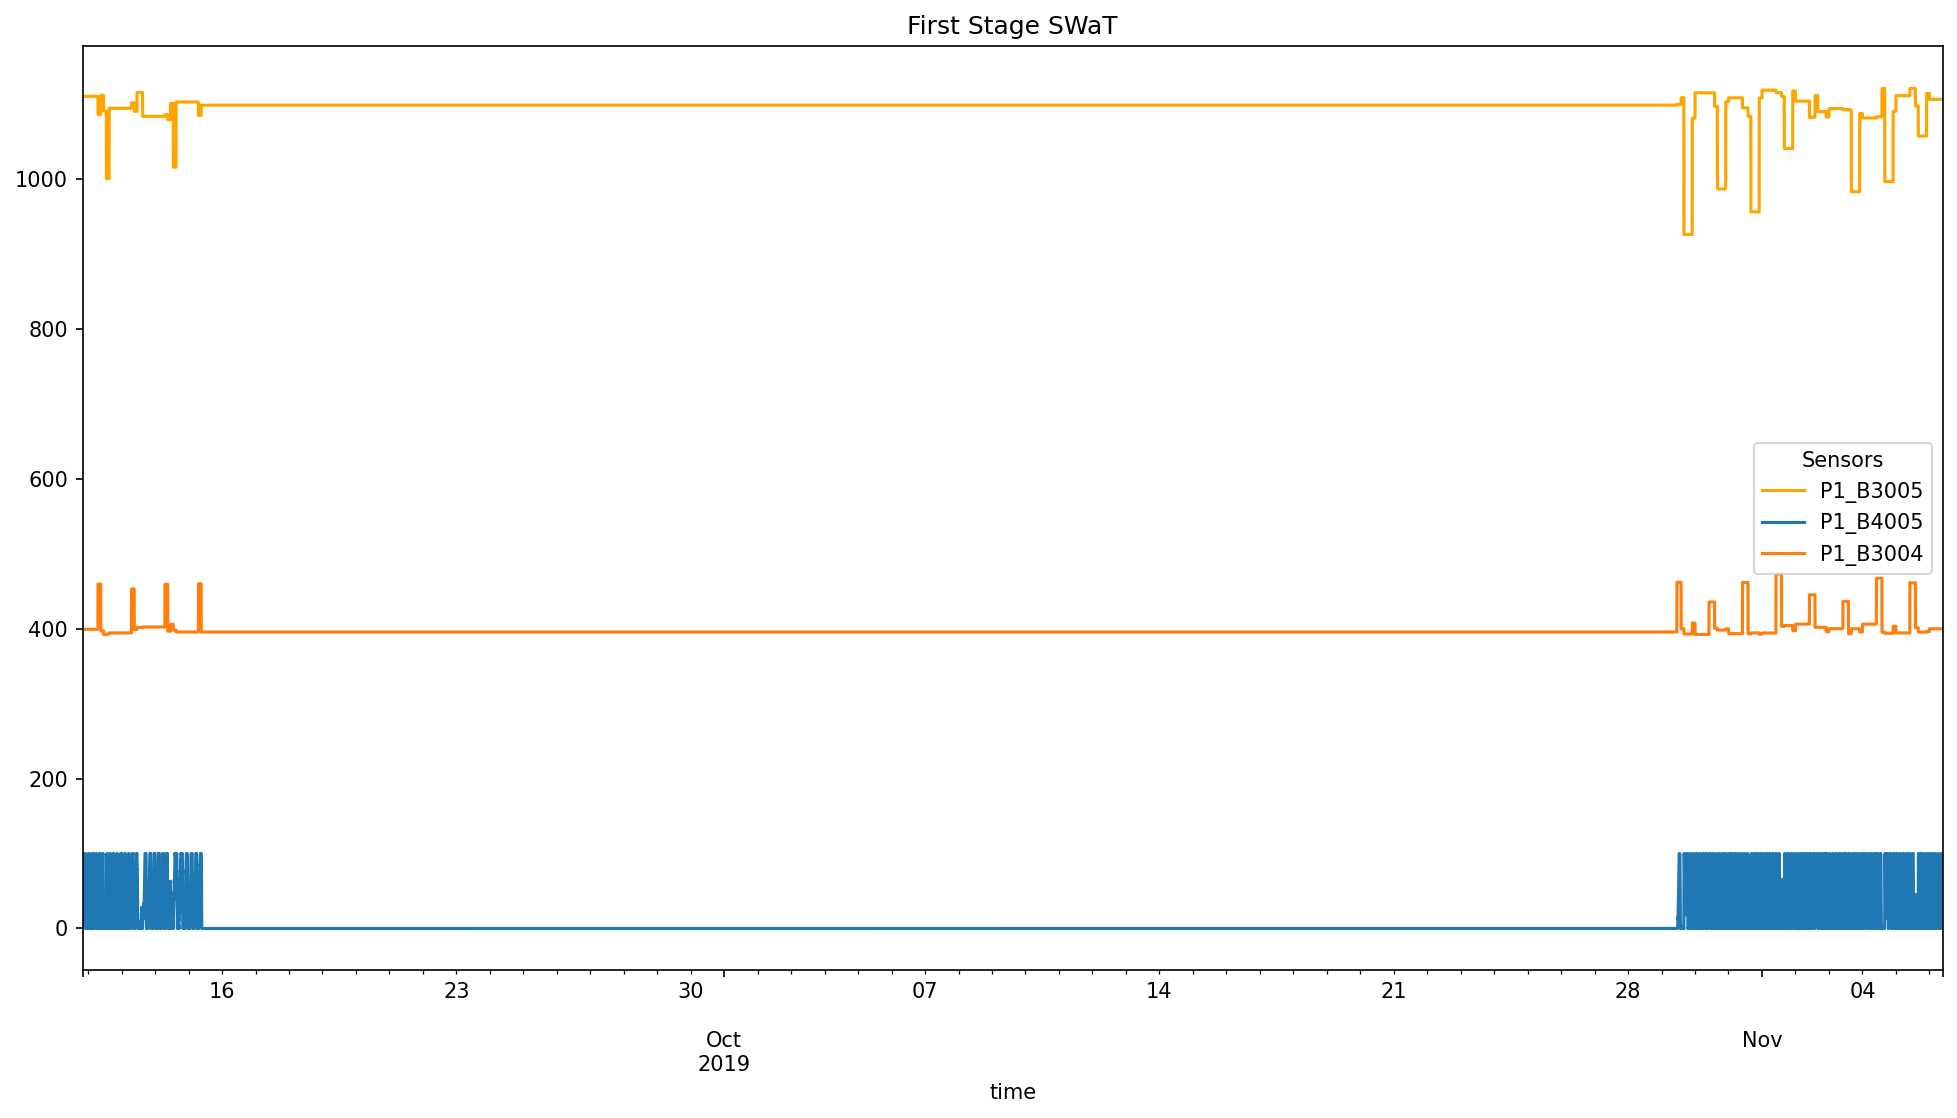

In [15]:
# Visualizing The first stage with respect to time series
def plot ():
    plt.figure(figsize=(16, 8), dpi=150)
    df1['P1_B3005'].plot(label='P1_B3005', color='orange')
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004')
    # adding title to the plot
    plt.title('First Stage SWaT')
    # adding Label to the x-axis
    plt.xlabel('time')
    # adding legend to the curve
    plt.legend(title='Sensors')

print (plot ())


#### Visualize the dataset
-  Plotting the number of normal and Attack transactions in the dataset.  

In [16]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['attack'] >= 0.1, 'lablel'] = 1
df1.loc[df1['attack'] ==0.0, 'lablel'] = 0

In [17]:
# fill the missing values with forward and backward of the cols

df1=df1.fillna(method="ffill")

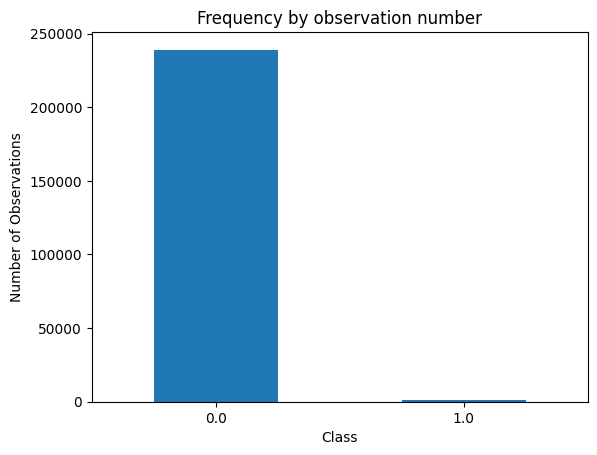

In [18]:
#Visualizing the imbalanced dataset
count_classes2 = pd.value_counts(df1['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [19]:
df1.shape

(240030, 61)

In [20]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with features and target variable
X = df1.drop('lablel', axis=1)
y = df1['lablel']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,lablel
0,0.0983,1.086703,399.2321,1110.3986,32.0,0.000477,31.381620,35.794627,0.0,0.284057,...,0.0,406.934798,-0.000290,338.821377,335.410637,50.9871,9973.000000,27628.933333,0.0,0.0
1,0.0983,1.109973,399.2321,1110.3986,32.0,0.001053,32.507140,35.872160,0.0,0.283800,...,0.0,413.468741,0.000950,344.586713,342.771033,50.9871,9956.933333,27628.866667,0.0,0.0
2,0.0983,1.112973,399.2321,1110.3986,32.0,0.000200,32.440953,35.882187,0.0,0.283800,...,0.0,411.715133,0.000800,342.937387,343.162853,50.9871,9953.400000,27629.000000,0.0,0.0
3,0.0983,1.109256,399.2321,1110.3986,32.0,0.001003,31.563708,35.871377,0.0,0.283800,...,0.0,407.671447,0.000947,339.465180,341.654010,50.9871,9963.500000,27629.000000,0.0,0.0
4,0.0983,1.044833,399.2321,1110.3986,32.0,0.000000,33.963713,35.655100,0.0,0.283800,...,0.0,341.535260,-0.000487,305.635147,318.535393,50.9871,9970.933333,27629.000000,0.0,0.0


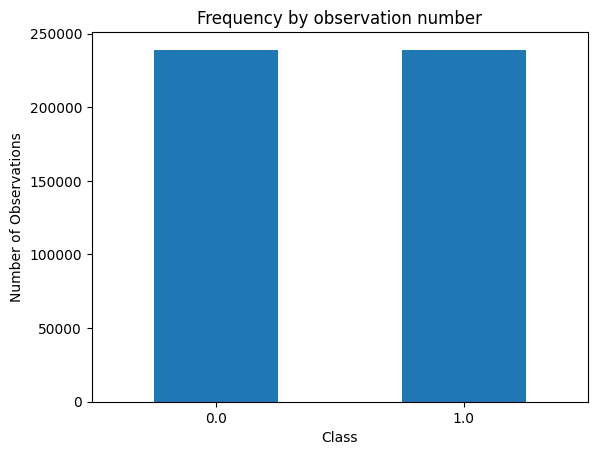

In [21]:
#Visualizing the balanced dataset
count_classes2 = pd.value_counts(df_resampled['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df_resampled['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [22]:
df_resampled.isna().sum()

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
attack        0
lablel        0
Length: 61, dtype: int64

In [23]:
#Count 1 unique values in each columns
df2=df_resampled.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1]

,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [24]:
# drop the  cols
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0)

# drop two columns name is 'C' and 'D'
df1=df_resampled.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS','attack'], axis=1)

In [25]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:

c=c.lablel.sort_values(ascending=False).head(42).keys().drop('lablel') # corelation
print(c)

Index(['P1_B2004', 'P1_B2016', 'P1_PCV01D', 'P1_PCV01Z', 'P4_ST_LD',
       'P4_ST_PO', 'P4_ST_FD', 'P4_LD', 'P3_LCV01D', 'P1_B3004', 'P4_HT_LD',
       'P4_HT_PO', 'P1_PIT01', 'P1_FT01', 'P4_ST_PT01', 'P1_FT01Z', 'P1_B400B',
       'P1_FT02Z', 'P1_B4005', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FT02', 'P1_PIT02',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_LIT01', 'P1_PCV02Z', 'P4_HT_FD',
       'P1_PCV02D', 'P1_LCV01D', 'P1_LCV01Z', 'P1_FT03', 'P1_B3005',
       'P1_FT03Z', 'P4_ST_PS', 'P1_B4022', 'P1_FCV02D', 'P1_FCV02Z',
       'P3_LCP01D', 'P1_B4002', 'P2_SIT01'],
      dtype='object')


In [27]:
# Select Multiple Columns
df2 = df1.loc[:,['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03','lablel']]

In [28]:
df2.shape

(478164, 42)

In [29]:
#To see how the data is spread betwen Attack and Normal
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count())
print(df2.groupby('lablel')['lablel'].count())

lablel
0.0    239082
1.0    239082
Name: lablel, dtype: int64


In [30]:
#df2.info()

#### Normalize using min Max scaler  

In [31]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03']
scaler = MinMaxScaler()
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV01D,P1_PCV01Z,P1_PCV02Z,P1_B2016,P1_B2004,P1_FT01Z,...,P1_FT03Z,P1_FCV02Z,P1_FCV02D,P1_LCV01Z,P2_VYT02,P1_LCV01D,P3_LCP01D,P2_VXT02,P2_VXT03,lablel
0,0.537694,0.535780,0.0,0.179768,0.352795,0.356159,0.028469,0.519577,0.950413,0.380597,...,0.831746,0.988524,1.0,0.194170,0.643546,0.205342,0.024384,0.757357,0.696693,0.0
1,0.539222,0.534014,0.0,0.193331,0.358773,0.356159,0.028469,0.531926,0.950413,0.408100,...,0.830337,0.988460,1.0,0.205021,0.648271,0.210397,0.007384,0.718559,0.682938,0.0
2,0.538615,0.534855,0.0,0.191900,0.364638,0.356159,0.028469,0.533518,0.950413,0.407196,...,0.831706,0.988352,1.0,0.205046,0.614225,0.209585,0.003446,0.739802,0.683933,0.0
3,0.537602,0.534105,0.0,0.191379,0.371676,0.367139,0.028414,0.531545,0.950413,0.405871,...,0.832207,0.988512,1.0,0.205046,0.646706,0.206908,0.001175,0.745425,0.694803,0.0
4,0.535170,0.534014,0.0,0.186378,0.371414,0.367858,0.028432,0.497357,0.950413,0.396248,...,0.833138,0.988429,1.0,0.197794,0.647280,0.200841,0.064173,0.765503,0.676433,0.0


In [32]:
# Taking a random sample of 20% of the data
df2 = df2.sample(frac=0.1, random_state=42)
df2.shape

(47816, 42)

#### Hyperparameter Tuning

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Load and preprocess your data
#data = pd.read_csv('your_data.csv')
X = df2.drop('lablel', axis=1)
y = df2['lablel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to create the autoencoder model
def create_autoencoder(optimizer='adam', loss='mean_squared_error', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(units=hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(units=X_train.shape[1], activation=activation))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Create the KerasRegressor wrapper
autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'loss': ['mean_squared_error', 'mean_absolute_error'],
    'activation': ['relu', 'sigmoid'],
    #'hidden_layers': [1,2,3,4,5,6],
    'hidden_units': [4,8, 16, 32,64,128,256],
    'epochs': [10,15,20,30],
    'batch_size': [10,32, 64],

}

# Perform random search
random_search = RandomizedSearchCV(estimator=autoencoder, param_distributions=param_grid, cv=3, n_iter=10)
random_search.fit(X_train, X_train)


# Get the best model and its hyperparameters
best_autoencoder = random_search.best_estimator_
best_parameters = random_search.best_params_

# Evaluate the best model on the test data
reconstruction_error = best_autoencoder.score(X_test, X_test)

print("Best Parameters:", best_parameters)
print("Reconstruction Error:", reconstruction_error)



<ipython-input-33-4afa5d4befe2>:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)


Best Parameters: {'optimizer': 'adam', 'loss': 'mean_squared_error', 'hidden_units': 64, 'epochs': 30, 'batch_size': 10, 'activation': 'sigmoid'}
Reconstruction Error: -0.00012869664351455867


In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

# Load and preprocess your data
#data = pd.read_csv('your_data.csv')
X = df2.drop('lablel', axis=1)
y = df2['lablel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to create the autoencoder model
def create_autoencoder(hidden_layers=1, hidden_units=16):
    model = Sequential()
    model.add(Dense(units=hidden_units, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(hidden_layers):
        model.add(Dense(units=hidden_units, activation='relu'))

    model.add(Dense(units=X_train.shape[1], activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor wrapper
autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'hidden_layers': [1, 2, 3],  # Possible number of hidden layers
    'hidden_units': [8, 16, 32, 64],  # Possible number of units in each layer
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

# Perform grid search cross-validation
grid = RandomizedSearchCV(estimator=autoencoder, param_distributions=param_grid, cv=5)
grid_result = grid.fit(X_train, X_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model on the testing set
best_model = grid_result.best_estimator_.model
mse = best_model.evaluate(X_test, X_test)
print("Mean Squared Error on Testing Set:", mse)


<ipython-input-34-d78da71796a2>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)


Best: -0.000247 using {'hidden_units': 64, 'hidden_layers': 1, 'epochs': 20, 'batch_size': 64}
299/299 [==============================] - 0s 998us/step - loss: 2.4599e-04
Mean Squared Error on Testing Set: 0.00024598720483481884
